# Question 1

### 1)

In [61]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

X = genfromtxt("population_X.csv", delimiter=',')
Y = genfromtxt("population_Y.csv", delimiter=',')
Z = genfromtxt("population_Z.csv", delimiter=',')

def gaussian(x, mean, sd):
    return (1/(sd * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x-mean)/sd)**2)

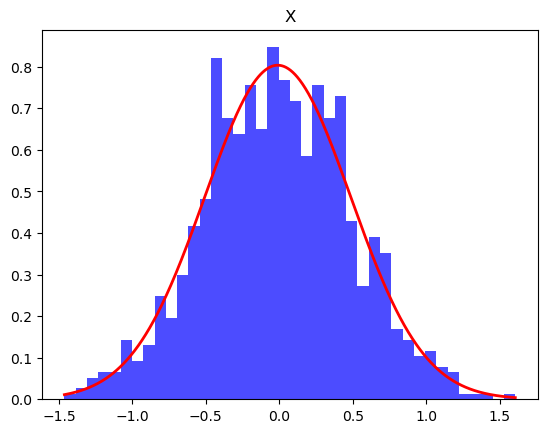

In [62]:
from scipy.stats import norm

x = np.linspace(min(X), max(X), 1000)
X_mean = np.mean(X)
X_sd = np.std(X)

# X is gaussian distribution
def p_x(x):
    dist = norm.pdf(x, X_mean, X_sd) # gaussian(x, X_mean, X_sd)
    return np.maximum(dist, 0.00001)

y = p_x(x)

plt.hist(X, 40, facecolor='blue', alpha=0.7, density=True)
plt.plot(x, y, color='red', linewidth=2)
plt.title("X")
plt.show()


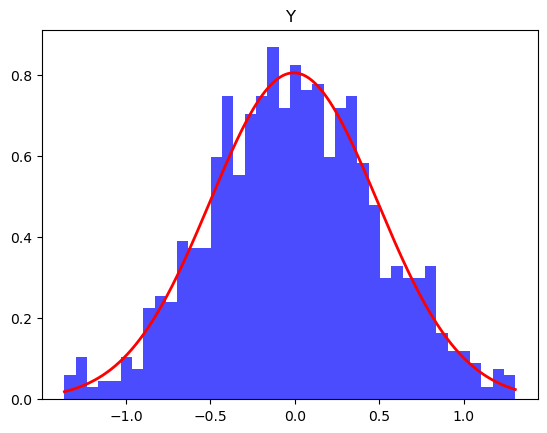

In [63]:
x = np.linspace(min(Y), max(Y), 1000)
Y_mean = np.mean(Y)
Y_sd = np.std(Y)

# Y is gaussian distribution
def p_y(x):
    dist = norm.pdf(x, Y_mean, Y_sd) # gaussian(x, Y_mean, Y_sd)
    return np.maximum(dist, 0.00001)

y = p_y(x)

plt.hist(Y, 40, facecolor='blue', alpha=0.7, density=True)
plt.plot(x, y, color='red', linewidth=2)
plt.title("Y")
plt.show()

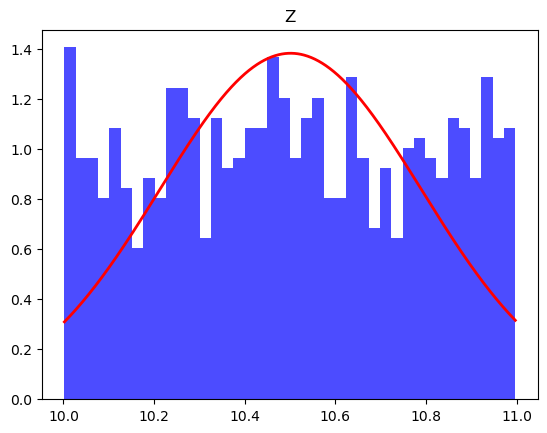

In [64]:
# a = min(Z)
# b = max(Z)
x = np.linspace(min(Z), max(Z), 1000)
Z_mean = np.mean(Z)
Z_sd = np.std(Z)

# def p_z(x):
#     if isinstance(x, np.ndarray):
#         return np.where((a<=x) & (x<=b), 1/(b - a), 0.0001)
#     else:
#         if a <= x <= b:
#             return 1/(b-a)
#         else:
#             return 0.00001
        
def p_z(x):
    dist = norm.pdf(x, Z_mean, Z_sd) # gaussian(x, Y_mean, Y_sd)
    return np.maximum(dist, 0.00001)

y = p_z(x)

plt.hist(Z, 40, facecolor='blue', alpha=0.7, density=True)
plt.plot(x, y, color='red', linewidth=2)
plt.title("Z")
plt.show()

### 2)
We should accept population Y's blood donations because the distribution is very similar to population X, the one that cures the disease.

### 3)

In [67]:
from scipy.integrate import quad 

def KL_divergence(x, p1, p2): 
    p_1 = p1(x)
    p_2 = p2(x)

    return p_1*np.log(p_1/p_2)

def KL_divergence_sample(x, p1, p2): 
    p_1 = p1(x)
    p_2 = p2(x)

    return np.log(p_1/p_2)

def KL_integral_XY(x):
    return KL_divergence(x, p_x, p_y)

def KL_integral_XZ(x):
    return KL_divergence(x, p_x, p_z)

def KL_sample_XY(x):
    return KL_divergence_sample(x, p_x, p_y)

def KL_sample_XZ(x):
    return KL_divergence_sample(x, p_x, p_z)


In [68]:
# samples = np.random.normal(np.mean(X), np.std(X), 1000000)
max_xy = max(np.max(X), np.max(Y))
min_xy = min(np.min(X), np.min(Y))
kl_xy, err = quad(KL_integral_XY, min_xy, max_xy) 
kl_sample_xy = np.mean(KL_sample_XY(X))

max_xz = max(np.max(X), np.max(Z))
min_xz = min(np.min(X), np.min(Z))
kl_xz, err = quad(KL_integral_XZ, min_xz, max_xz) 
kl_sample_xz = np.mean(KL_sample_XZ(X))
    # return np.where(mask, p1_val * np.log(p1_val / p2_val), 0)

print(f'KL Divergence of px and py using integral: {kl_xy:.10f}')
print(f'KL Divergence of px and py using sampling: {kl_sample_xy:.10f}')

print(f'KL Divergence of px and pz using integral: {kl_xz:.10f}')
print(f'KL Divergence of px and pz using sampling: {kl_sample_xz:.10f}')

# Assume ε as the midpoint of the KL divergences
ε = (kl_xz - kl_xy)/2
print(f'Reasonable ε: {ε}')


KL Divergence of px and py using integral: -0.0000524670
KL Divergence of px and py using sampling: 0.0000329247
KL Divergence of px and pz using integral: 10.7838063114
KL Divergence of px and pz using sampling: 10.7944224927
Reasonable ε: 5.391929389193444


### 4)

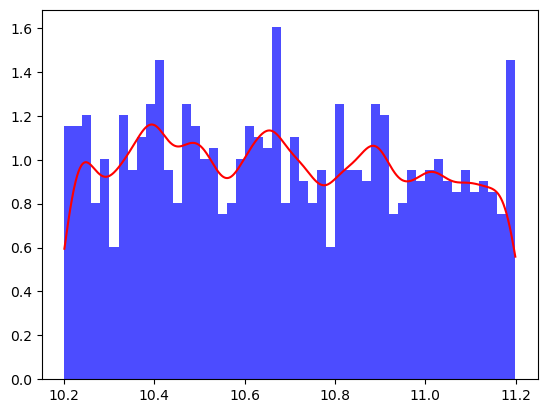

In [71]:
# Get KDE of Q
Q = genfromtxt("population_Q.csv", delimiter=',')

sd = 0.03
n = len(Q)

def p_q(x):
    pdf = 0
    for i in range(n):
        pdf = pdf + norm.pdf(x, Q[i], sd) # gaussian(x, Q[i], sd)
        
    pdf = pdf/n
    return pdf

x = np.linspace(np.min(Q), np.max(Q), 1000)
pdf = p_q(x)

plt.hist(Q, 50, facecolor='blue', alpha=0.7, density=True)
plt.plot(x, pdf, color='red')
plt.show()


In [72]:
dist_list = [X, Y, Z, Q]
p_list = [p_x, p_y, p_z, p_q]


for dist, p in zip(dist_list, p_list):
    def entropy(x):
        px = p(x)
        
        return px * np.log(1/px)

    def entropy_sampling(x):
        return -np.log(p(x))
    
    H, err = quad(entropy, np.min(dist), np.max(dist)) 

    H_sample = np.mean(entropy_sampling(dist))
    
    print(f'Entropy of {p.__name__} using auto integration: {H}')
    print(f'Entropy of {p.__name__} using sampling: {H_sample}')

Entropy of p_x using auto integration: 0.7055854775161525
Entropy of p_x using sampling: 0.7185029722685773
Entropy of p_y using auto integration: 0.6823162599363102
Entropy of p_y using sampling: 0.7158629673318156
Entropy of p_z using auto integration: 0.005321526868999161
Entropy of p_z using sampling: 0.17563327268240225
Entropy of p_q using auto integration: 0.021327707555726987
Entropy of p_q using sampling: 0.029284336919136292


According to grace's theory, Q is closer to population Z. This makes sense, as when graphing population Q we can see that it is closer to a uniform distribution than a normal distribution. So Grace's theory makes sense and she should get a raise.

# Question 2

In [73]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data["data"]
Y = data["target"]

In [75]:
# Preprocessing and Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_rest, y_train, y_rest = train_test_split(X, Y, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_rest, y_rest, test_size=0.5)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Preproccess testing and validation data
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [118]:
def mse_func(predictions, y):
    return np.mean((predictions - y)**2)

def accuracy_func(predictions, y):
    return np.mean(predictions == y)

### 1)

In [121]:
# K-NN
def get_prediction(v, k, X, y):
    dist = np.linalg.norm(X - v, axis=1, ord=2)  # Use L2 Norm
 
    dist = dist[dist != 0]

    nearest_indices = np.argsort(dist)[:k]

    nearest_labels = y[nearest_indices]

    prediction = np.argmax(np.bincount(nearest_labels))

    return prediction

def knn(k, X, y):
    predictions = np.array([])

    for vector in X:
        prediction = get_prediction(vector, k, X, y)
        predictions = np.append(predictions, prediction)

    return predictions

k = round(np.sqrt(len(X)))  # use square root of number of samples as k

predictions = knn(k, X_train, y_train)


mse = mse_func(predictions, y_train)

print(f"MSE of K-NN: {mse:.4f}")
accuracy = accuracy_func(predictions, y_train)
print(f"Accuracy of K-NN: {accuracy:.2f}")

MSE of K-NN: 0.1297
Accuracy of K-NN: 0.87


### 2)

In [120]:
# Logistic Regression

def f_prime(w, phi, y):
    return 1/phi.shape[0] * phi.T @ (sigmoid(phi, w) - y)

def sigmoid(phi, w):
    return 1/(1 + np.exp(-phi @ w))

def gradient_descent(phi, y, w, eta, num_iterations):
	for i in range(num_iterations):
		w = w - eta * f_prime(w, phi, y)
            
	return w

phi = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

w0 = np.zeros(phi.shape[1])
eta = 0.01
num_iterations = 2000

w = gradient_descent(phi, y_train, w0, eta, num_iterations)

predictions = np.round(sigmoid(phi, w))

mse = mse_func(predictions, y_train)
print(f"MSE of Logistic Regression: {mse:.4f}")
accuracy = accuracy_func(predictions, y_train)
print(f"Accuracy of Logistic Regression: {accuracy:.2f}")



MSE of Logistic Regression: 0.0176
Accuracy of Logistic Regression: 0.98


### 3)

In [ ]:
# SVM algorithm

### 4)

In [124]:
# Predicting using K-NN
knn_predictions = knn(k, X_val, y_val)
knn_mse = mse_func(knn_predictions, y_val)
knn_accuracy = accuracy_func(knn_predictions, y_val)

# Predicting using Logistic Regression
phi = np.hstack((np.ones((X_val.shape[0], 1)), X_val))
logistic_predictions = np.round(sigmoid(phi, w))
logistic_mse = mse_func(logistic_predictions, y_val)
logistic_accuracy = accuracy_func(logistic_predictions, y_val)

print(f"MSE of K-NN: {knn_mse:.4f}")
print(f"Accuracy of K-NN: {knn_accuracy:.2f} \n")

print(f"MSE of Logistic Regression: {logistic_mse:.4f}")
print(f"Accuracy of Logistic Regression: {logistic_accuracy:.2f}")




MSE of K-NN: 0.1228
Accuracy of K-NN: 0.88 

MSE of Logistic Regression: 0.0175
Accuracy of Logistic Regression: 0.98


# Question 3

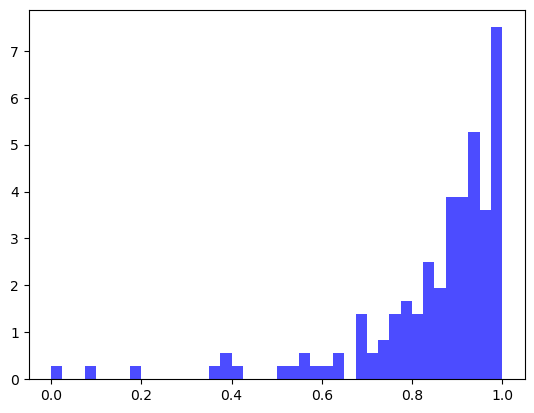

In [126]:
X = genfromtxt("2024_Fall_exam1.csv", delimiter=',')
plt.hist(X, 40, facecolor='blue', alpha=0.7, density=True)
plt.show()


### 1)

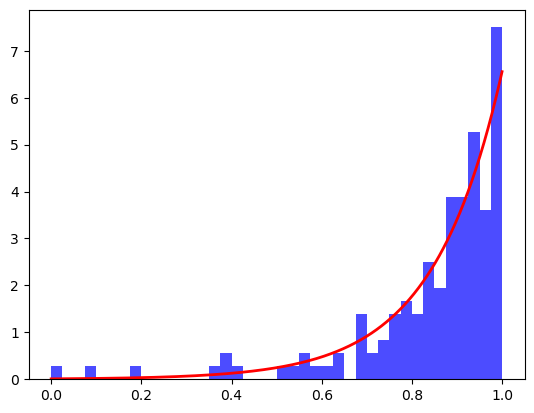

In [139]:
# flipped and move up 1
theta1 = 1/np.mean(-(X-1))
def p1(x):
    return theta1 * np.exp(theta1*(x-1))

x = np.linspace(min(X), max(X), 1000)

y = p1(x)

plt.hist(X, 40, facecolor='blue', alpha=0.7, density=True)
plt.plot(x, y, color='red', linewidth=2)
plt.show()


### 2)

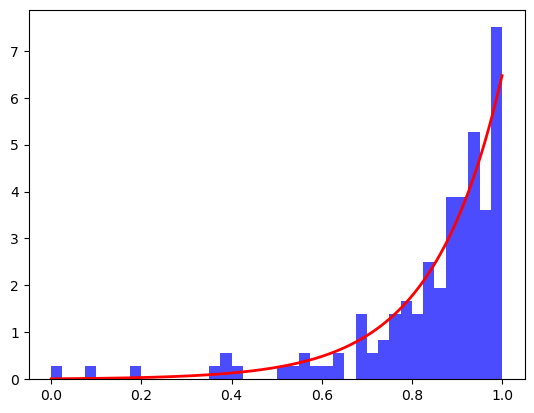

In [149]:
# maximum log likelihood
new_X = -(X-1)
n = len(new_X)
def log_likelihood(theta): # the log likelihood of joint
	return n*np.log(theta) - theta*sum(new_X)

def log_likelihood_prime(theta):
	return n/theta - sum(new_X)

theta2 = 1
eta = 0.0001

for i in range(10000):
	theta2 = theta2 + eta*log_likelihood_prime(theta2)

def p2(x):
    return theta2 * np.exp(theta2*(x-1))

x = np.linspace(min(X), max(X), 1000)

y = p2(x)
plt.hist(X, 40, facecolor='blue', alpha=0.7, density=True)
plt.plot(x, y, color='red', linewidth=2)
plt.show()

### 3)

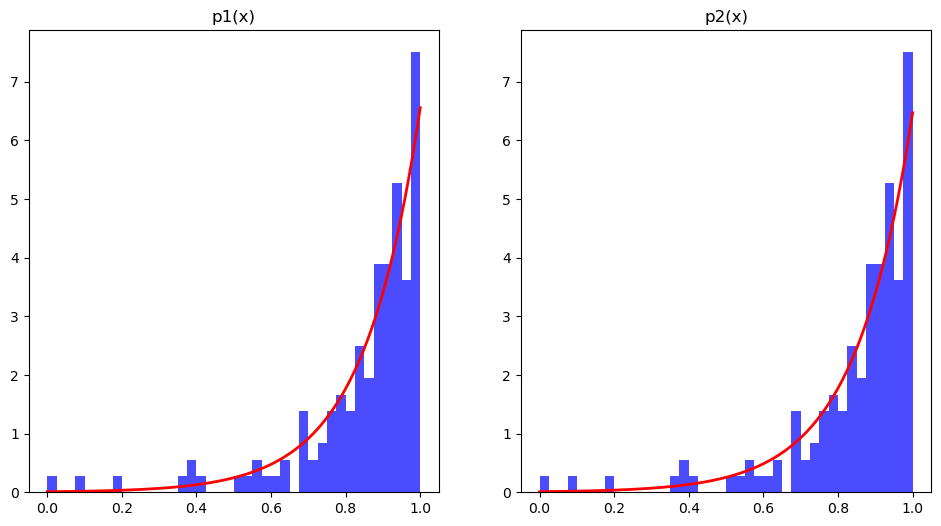

In [153]:
# Plot side by side
plt.figure(figsize=(18, 6))

x = np.linspace(min(X), max(X), 1000)
y1 = p1(x)
y2 = p2(x)

plt.subplot(1, 3, 1)
plt.hist(X, 40, facecolor='blue', alpha=0.7, density=True)
plt.plot(x, y1, color='red', linewidth=2)
plt.title("p1(x)")

plt.subplot(1, 3, 2)
plt.hist(X, 40, facecolor='blue', alpha=0.7, density=True)
plt.plot(x, y2, color='red', linewidth=2)
plt.title("p2(x)")

plt.show()


### 4)

In [155]:
# a)
min_score = .88
A, err = quad(p1, .88, np.max(X))
print(f'Percent of Students Getting A (Numpy Integration): {A}')

Percent of Students Getting A (Numpy Integration): 0.544576299015904


In [162]:
# b)
n = 100000
samples = np.random.uniform(min_score, 1, 100000)

mean = (1-min_score) * np.mean(p1(samples))
print(f'Percent of Students Getting A (Uniform Sample): {mean}')

Percent of Students Getting A (Uniform Sample): 0.5443126595335509
